In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# измерения

In [3]:
rcalib = '''2922 7032
2892 6929
2824 6717
2812 6678
2790 6599
2766 6533
2754 6507
2720 6402
2712 6383
2694 6334
2680 6305
2664 6267
2640 6217
2624 6164
2612 6143
2592 6096
2582 6074
2564 6030
2542 5976
2526 5945
2498 5882
2482 5852
2218 5401
2180 5341
2168 5331'''
calib = np.array([list(map(float, s.split())) for s in rcalib.split('\n')])

# Калибровка

In [22]:
def graph():
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$\\theta$, град.')
    plt.ylabel('$\lambda, \AA$')
    x = calib[::,0]
    y = calib[::,1]
    plt.errorbar(x, y, fmt='.k', xerr=1, yerr=1)

    p = np.poly1d(np.polyfit(x, y, 2))
    a, b, c = np.polyfit(x, y, 2)
    print(a * 2168 ** 2 + b * 2168 + c)

    stretch = np.linspace(np.min(x)*0.95, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, p(stretch))
    plt.legend([ax], ['Аппроксимированная прямая'])
    plt.savefig('graph.jpg')
    return p

5333.354442655009


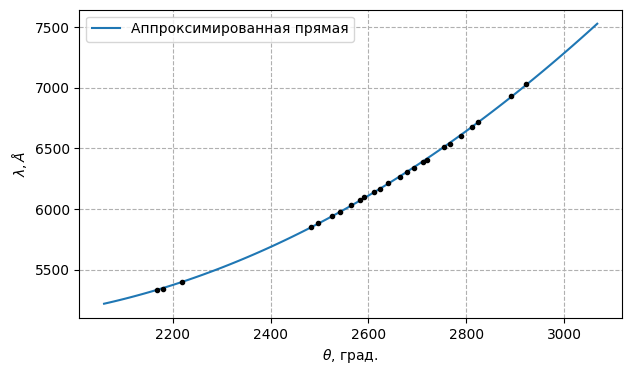

In [23]:
p = graph()

# измерения

In [39]:
rdata1 = '''6.114 0.538
4.030 0.485
3.036 0.428
2.007 0.270
1.500 0.183
1.000 0.108
0.500 0.050
0.249 0.028
0.151 0.027
0.090 0.022
0.050 0.019
-0.020 0.016
-0.070 0.012
-0.132 0.009
-0.176 0.006
-0.201 0.005'''

rdata2 = '''5.691 0.483
4.534 0.445
3.493 0.378
2.496 0.255
1.613 0.144
1.017 0.086
0.505 0.046
0.214 0.029
0.156 0.026
0.076 0.022
0.025 0.020
-0.031 0.019
-0.081 0.016
-0.142 0.014
-0.192 0.011
-0.230 0.009
-0.271 0.007
-0.299 0.006'''

rdata4 = '''-0.195 0.009
-0.253 0.006
-0.286 0.004
-0.120 0.015
-0.059 0.019
0.010 0.023
0.079 0.026
0.172 0.033
0.298 0.042
0.435 0.053
0.580 0.066
0.713 0.080
0.821 0.092
0.960 0.108
1.150 0.131
1.304 0.153
1.600 0.197
2.030 0.265
2.996 0.404
3.977 0.462
4.974 0.494'''

data1 = np.array([list(map(float, s.split())) for s in rdata1.split('\n')])
data2 = np.array([list(map(float, s.split())) for s in rdata2.split('\n')])
data4 = np.array([list(map(float, s.split())) for s in rdata4.split('\n')])

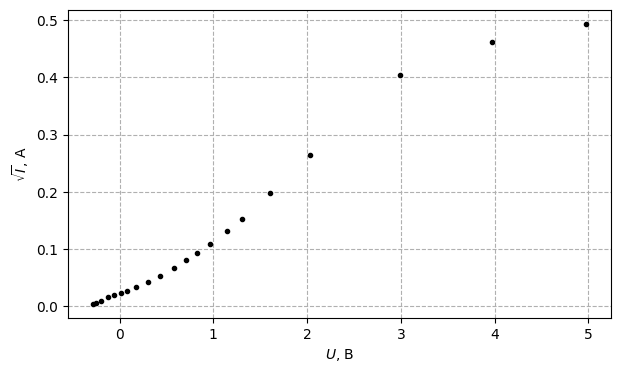

In [44]:
def graph_2():
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$U$, В')
    plt.ylabel('$\sqrt{I}$, А')
    x = data4[::,0]
    y = data4[::,1]
    plt.errorbar(x, y, fmt='.k')
    def MSE(x, y):
        D = (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)
        b = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / D
        a = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / D
        return (a, b)
    # k, b = MSE(x, y)
    # x_0 = -b / k
    # stretch = np.linspace(x_0 - abs(x_0) * 0.05, np.max(x)*1.05, num=100)
    # ax, = plt.plot(stretch, stretch * k + b)
    # plt.legend([ax], ['Аппроксимированная прямая'])
    plt.savefig('kach.png', dpi=300)
    # db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    # dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    # return (k, b, dk, db)
graph_2()

In [46]:
def graph_2(data, index, name):
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$U$, В')
    plt.ylabel('$\sqrt{I}$, А')
    x = data[:index:,0]
    y = data[:index:,1] ** 0.5
    plt.errorbar(x, y, fmt='.k', xerr=np.full(x.shape, 0.001), yerr=0.001 / y / 2)
    def MSE(x, y):
        D = (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)
        b = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / D
        a = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / D
        return (a, b)
    k, b = MSE(x, y)
    x_0 = -b / k
    stretch = np.linspace(x_0 - abs(x_0) * 0.05, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, stretch * k + b)
    plt.savefig('graph_2_{}.png'.format(name), dpi=300)
    db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    return (k, b, dk, db)

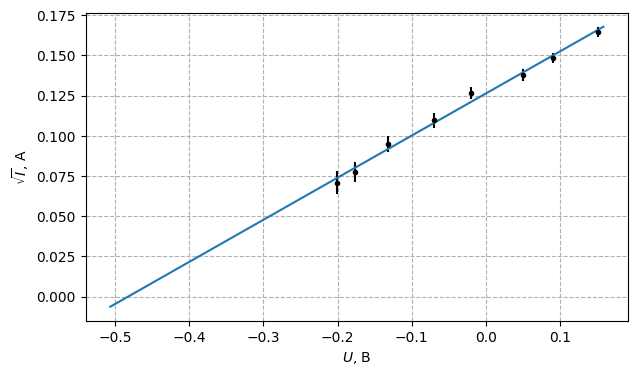

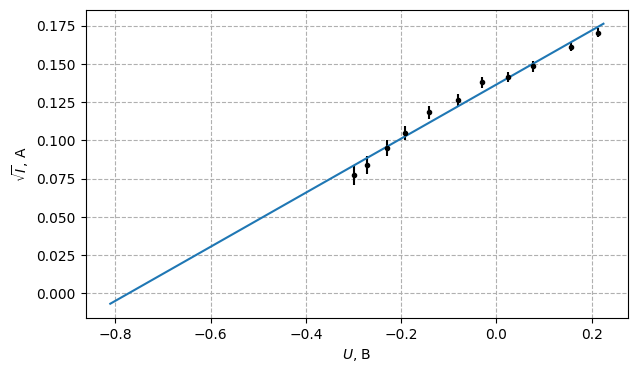

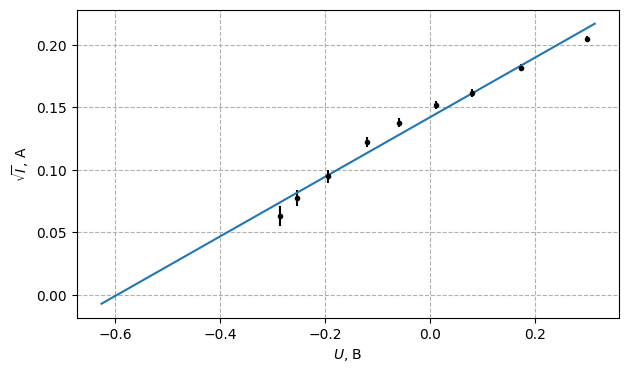

In [47]:
kv = [0, 0, 0]
bv = [0, 0, 0]
dkv = [0, 0, 0]
dbv = [0, 0, 0]
(kv[0], bv[0], dkv[0], dbv[0]) = graph_2(np.sort(data1, axis=0), -8, '1')
(kv[1], bv[1], dkv[1], dbv[1]) = graph_2(np.sort(data2, axis=0), -7, '2')
# graph_2(np.sort(data3, axis=0), -1, '3')
(kv[2], bv[2], dkv[2], dbv[2]) = graph_2(np.sort(data4, axis=0), -12, '4')

kv = np.array(kv)
bv = np.array(bv)
dkv = np.array(dkv)
dbv = np.array(dbv)

In [171]:
kv

array([0.26179132, 0.17686046, 0.23863222])

In [170]:
dkv

array([3.19503188e-05, 4.22511510e-05, 1.10100811e-04])

In [169]:
bv

array([0.12627341, 0.13653448, 0.14220723])

In [168]:
dbv

array([4.03356166e-06, 7.60974036e-06, 2.09686730e-05])

In [186]:
theta = np.array([2350, 1850, 2050])
print(p(theta))

[6203.70676912 5305.72931563 5581.75880026]


In [172]:
def graph_3():
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$\omega$, 1/с')
    plt.ylabel('$V_0$, В')
    x = 3e18 / p(theta)
    y = np.abs(-bv / kv)
    plt.errorbar(x, y, fmt='.k', xerr=0, yerr=((1.0 / kv ** 2) * dbv ** 2 + (bv ** 2 / kv ** 4) * dkv ** 2) ** 0.5)
    def MSE(x, y):
        a = (np.sum((x - np.mean(x)) * (y - np.mean(y))))/(np.sum((x - np.mean(x))**2))
        b = np.mean(y) - a * np.mean(x)
        return (a, b)
    k, b = MSE(x, y)
    stretch = np.linspace(np.min(x) * 0.95, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, stretch * k + b)
    plt.legend([ax], ['Аппроксимированная прямая'])
    plt.savefig('graph_3.jpg')
    db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    return (k, b, dk, db)

[5.88676356e-05 1.84424824e-04 2.74950179e-04]


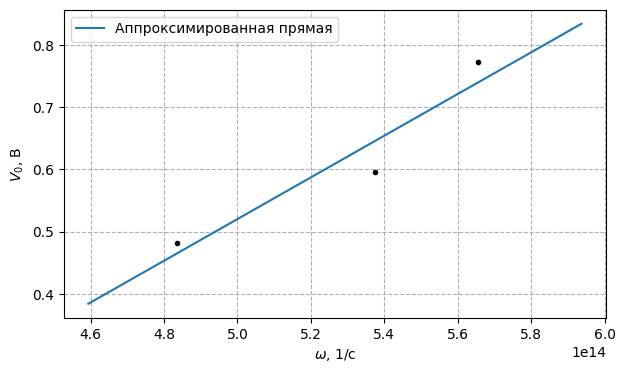

In [173]:
(he, we, dhe, dwe) = graph_3()

In [187]:
print(he, we, dhe, dwe)
h = 1.6e-19 * he / 2 / pi
dh = 1.6e-19 * dhe / 2 / pi
print(h, dh)
print(we)
print(we / he)

3.3464835762407118e-15 -1.1529490431031357 6.519461610970863e-17 0.03454755266987116
8.521750450152846e-35 1.6601672666941824e-36
-1.1529490431031357
